# Gradient Descent

Em geral, todo algoritmo de **Machine Learning** é composto de três partes principais:

1. Uma função Loss
2. Critérios de otimização com base na função Loss
3. Técnica de otimização: este processo alavanca os dados de treinamento para encontrar uma solução para os critérios de otimização (função Loss)

Durante o treinamento, alteramos os parâmetros de nosso modelo de machine learning para tentar minimizar a função Loss. No entanto, surge a questão de como alteramos esses parâmetros. Além disso, por quanto devemos alterá-los durante o treinamento e quando. Para responder a todas essas perguntas, usamos otimizadores. Eles colocam todas as diferentes partes do algoritmo de machine learning juntas.

O algoritmo **Gradient Decent** é uma técnica de otimização popular. Neste notebook, focamos nele, o avô de todas as técnicas de otimização e sua variação estocástica. Observe que essas técnicas não são algoritmos de machine learning, são solucionadores de problemas de minimização em que a função a minimizar possui gradiente na maioria dos pontos de seu domínio.

## Imports e Conjuntos de Dados

Para este experimento, vamos usar as bibliotecas [Scikit-Learn](https://scikit-learn.org/), [Matplotlib](https://matplotlib.org/) e [NumPy](https://numpy.org/).

O conjunto de dados que trabalharemos é gerado pelo Scikit-Learn, se trata de um problema de regressão aleatório para fins experimentais.

In [390]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import datasets
import numpy as np

X, y = datasets.make_regression(n_samples=300, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Por que usamos Otimizadores?

Observe que também usamos a [regressão linear simples](https://en.wikipedia.org/wiki/Simple_linear_regression) em todos os exemplos. 

Devido ao fato de explorarmos técnicas de otimização, escolhemos o algoritmo de machine learning mais fácil.  

Como um lembrete rápido, a fórmula para regressão linear é assim:

$ f(X) = w * X + b $

Onde $w$ e $b$ são parâmetros do algoritmo de machine learning. O objetivo do processo de treinamento é definir os valores corretos para $w$ e $b$, para obtermos a **saída** desejada do modelo de machine learning. Isso significa que estamos tentando tornar o valor do nosso **vetor de erro** o menor possível, ou seja, encontrar um **mínimo global da função Loss**.

Uma maneira de resolver esse problema é usar o cálculo. Poderíamos calcular derivadas e então usá-las para encontrar lugares onde é um extremo da função Loss. No entanto, a função Loss não é função de uma ou de algumas variáveis; é uma função de todos os parâmetros de um algoritmo de machine learning, portanto, esses cálculos se transformarão rapidamente em um monstro. É por isso que usamos esses otimizadores.

## Intuição do Gradient Descent

Esta técnica é a técnica de otimização mais popular. É também uma base para outras técnicas. Existe uma analogia útil que descreve muito bem esse processo. Imagine que você tenha uma bola dentro de um vale arredondado, como na imagem abaixo. Se você deixar a bola rolar, ela irá de um lado a outro do vale, até ficar parada no fundo.

![img](https://raw.githubusercontent.com/the-akira/DeepLearning/master/Imagens/GradientDescent.png)

Essencialmente, podemos observar esse comportamento como se a bola estivesse otimizando sua posição da esquerda para a direita e, eventualmente, ela para na parte inferior, ou seja, o ponto mais baixo do vale. O fundo, neste caso, é o mínimo de nossa função Loss. Isso é o que o algoritmo Gradient Descent está fazendo. Ele começa de uma posição na qual, calculando as derivadas e as segundas derivadas da função Loss, obtém a informação sobre onde “a bola” deve rolar. Cada vez que calculamos as derivadas, obtemos informações sobre a inclinação do lado da função (ou seja, do vale) em sua posição atual.

Quando a inclinação é negativa (para baixo da esquerda para a direita), a bola deve se mover para a direita, caso contrário, ela deve se mover para a esquerda. Esteja ciente de que a bola é apenas uma analogia, e não estamos tentando desenvolver uma simulação precisa das leis da física. Estamos tentando obter o mínimo da função Loss usando esse método alternativo, pois já percebemos que usar cálculo não é o ideal.

Em poucas palavras, o processo de treinamento de Regressão Linear com Gradiente Descendente pode ser descrito assim:

1. Coloque o conjunto de treinamento no algoritmo de machine learning e obtenha a **saída** para cada amostra nele;
2. A **saída** é comparada com a **saída desejada** e o erro é calculado usando uma função Loss;
3. Com base no valor do erro e na função Loss usada, uma decisão sobre como $w$ e $b$ devem ser alterados é feita a fim de minimizar o valor do erro;
4. O processo é repetido até que o erro seja mínimo.

## Compreendendo o Gradient Descent

Vamos formalizar isso em termos mais matemáticos. Não sabemos quais são os valores ideais para $w$ e $b$ na fórmula de regressão linear:

$$f(x) = w * X + b$$

Não sabemos quais são os valores ideais para $w$ e $b$ na fórmula de regressão linear:

$MSE = \frac{1}{N} \sum\limits_{i=1}^n (y_i - (w * x_i + b))^2$

Onde $N$ é o número de amostras no conjunto de dados, $y_i$ é o valor de saída real e $x_i$ é o vetor de entrada (onde cada feature é representado por uma coordenada separada). O primeiro passo no Gradient Descent seria definir derivadas parciais para cada parâmetro. Para $w$, usamos a regra da cadeia e obtemos o resultado:

$\frac{\partial MSE}{\partial w} = \frac{1}{N} \sum\limits_{i=1}^n -2x_i(y_i - (w * x_i + b))^2$

E para $b$ temos:

$\frac{\partial MSE}{\partial b} = \frac{1}{N} \sum\limits_{i=1}^n -2x_i(y_i - (w * x_i + b))^2$

Uma vez que sabemos como calcular derivadas parciais para todos os parâmetros no modelo de machine learning (neste caso $w$ e $b$) para a função Loss definida (neste caso [MSE](https://en.wikipedia.org/wiki/Mean_squared_error)), então podemos inicializar os valores para esses parâmetros ($w$ e $b$). O processo de inicialização é um tópico completamente diferente fora do escopo deste tutorial. Portanto, neste notebook, inicializaremos esses valores como **0**. Em seguida, iniciamos a iteração por meio dos exemplos do conjunto de treinamento e atualizamos $w$ e $b$, utilizando derivadas parciais após cada amostra:

$w_i \leftarrow \alpha \frac{-2x_i(y_i - (w_i - 1 * x_i + b_i - 1))}{N}$

$b_i \leftarrow \alpha \frac{-2x_i(y_i - (w_i - 1 * x_i + b_i - 1))}{N}$

Onde alfa ($\alpha$) é o hiperparâmetro da taxa de aprendizagem (**learning rate**). Este hiperparâmetro controla o quão “forte” é uma atualização. Quando examinamos todos os exemplos do conjunto de treinamento, chamamos isso de época (**epoch**). Em geral, treinamos nossos algoritmos de machine learning por várias épocas.

## Gradient Descent em Python

Sabendo a teoria, agora vamos para a implementação em Python, iremos definir uma classe **GradientDescent** que irá encapsular as funcionalidades do algoritmo:

In [391]:
class GradientDescent:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            for i in range(N):
                Xi = X[i, :]
                yi = y[i]
                
                f = yi - (self.w * Xi + self.b)
                                
                self.w -= self.learning_rate * (-2 * Xi.dot(f.T).sum() / N)
                self.b -= self.learning_rate * (-2 * f.sum() / N)

            loss = mean_squared_error(y, (self.w * X + self.b))
                                      
            if e % 10 == 0:
                print(f"Epoch: {e}, Loss: {loss}")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

É uma classe muito simples. Em essência, criamos um algoritmo que usa regressão linear com Gradient Descent. É importante dizer isso: aqui, o algoritmo ainda é a regressão linear, mas o método que nos ajudou a aprender $w$ e $b$ é o Gradient Descent. Podemos mudar para qualquer outro algoritmo de aprendizagem.

No construtor da classe, inicializamos o valor de $w$ e $b$ como zero. Além disso, inicializamos o hiperparâmetro da taxa de aprendizagem. Existem dois métodos:

- **fit** - Este é o método que realiza o processo de treinamento. Observe que ele retorna o histórico, onde registramos a Loss durante o treinamento. Isso é feito para visualizações futuras. Além disso, para atualizar $w$ e $b$, usamos as fórmulas definidas anteriormente.
- **predict** - Método que prevê o valor.

Observe que para a Loss usamos MSE (Mean Squared Error) e no código, usamos a função do Scikit-Learn para calculá-la. 

Vamos então instanciar o modelo, treiná-lo e fazer previsões:

In [392]:
model = GradientDescent(learning_rate=0.01)
history = model.fit(X_train, y_train, 250)
predictions = model.predict(X_test)

Epoch: 0, Loss: 5235.695766488958
Epoch: 10, Loss: 3765.4750782322703
Epoch: 20, Loss: 2735.053661156368
Epoch: 30, Loss: 2011.330356767969
Epoch: 40, Loss: 1501.9786744856056
Epoch: 50, Loss: 1142.7999967558865
Epoch: 60, Loss: 889.0479558364341
Epoch: 70, Loss: 709.4620315085493
Epoch: 80, Loss: 582.1539980939872
Epoch: 90, Loss: 491.76470783936986
Epoch: 100, Loss: 427.4940227098094
Epoch: 110, Loss: 381.73240516532087
Epoch: 120, Loss: 349.10813478543946
Epoch: 130, Loss: 325.82235476874826
Epoch: 140, Loss: 309.1839372898795
Epoch: 150, Loss: 297.283403490642
Epoch: 160, Loss: 288.7638407005637
Epoch: 170, Loss: 282.6596353695972
Epoch: 180, Loss: 278.28272497018366
Epoch: 190, Loss: 275.1422182512228
Epoch: 200, Loss: 272.8874953948089
Epoch: 210, Loss: 271.2678625290428
Epoch: 220, Loss: 270.10389966986725
Epoch: 230, Loss: 269.2670831905173
Epoch: 240, Loss: 268.66527337021756


Podemos ver como nosso algoritmo está convergindo, porque a Loss está diminuindo lentamente. Uma vez feito isso, podemos plotar o histórico e ver como a função Loss diminuiu durante o processo de treinamento:

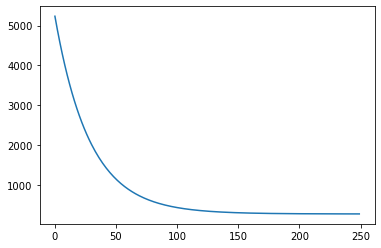

In [393]:
plt.plot(history);

Outra coisa que podemos fazer é plotar o modelo final:

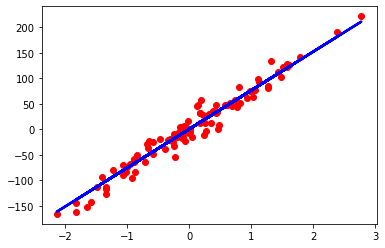

In [394]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, predictions, c='blue', lw=2.5);

O maior problema do Gradient Descent é que ele pode convergir para um mínimo **local** e não **global**. No nosso caso isso não é um problema, já que MSE é uma função convexa que tem apenas um mínimo - o próprio global. O outro problema é que, para grandes conjuntos de dados, essa abordagem pode levar algum tempo.

## Stochastic Gradient Descent

O [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) é uma versão atualizada do algoritmo **Batch Gradient Descent** que acelera o cálculo aproximando o gradiente usando subconjuntos menores dos dados de treinamento. Esses subconjuntos são chamados de **mini-batches** ou apenas **batches**.

Às vezes, na literatura, você descobrirá que Stochastic Gradient Descent é uma versão do Gradient Descent que escolhe uma amostra aleatória do conjunto de dados de entrada e que o Mini-Batch Gradient Descent pega um subconjunto de amostras do conjunto de dados de entrada. No entanto, essas linhas formais são um pouco confusas no dia a dia de trabalho.

Se alguém disser que usa o Stochastic Gradient Descent, é muito provável que esteja se referindo àquele que usa os mini-batches. Afinal, uma amostra é apenas um subconjunto com um elemento. Neste notebook, estamos usando este contexto - que Stochastic Gradient Descent usa mini-batches que são o subconjunto do conjunto de dados de entrada.

Como esse algoritmo funciona com consideravelmente menos dados do que o Batch Gradient Descent, ele é mais rápido. Além disso, isso significa que esse algoritmo pode ser usado em grandes conjuntos de dados. No entanto, devido à sua natureza aleatória, esse processo é muito menos **regularizado**. A Loss não irá linearmente ao mínimo, mas irá saltar para cima e para baixo até que se estabilize e converge. 

Vamos ver como é a implementação desse algoritmo em Python, mas primeiramente vamos definir um novo conjunto de dados de experimentos.

In [395]:
X, y = datasets.make_regression(n_samples=500, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

A única coisa que precisamos melhorar em relação à implementação anterior é dar ao usuário de nossa classe a capacidade de definir o tamanho do **batch**:

In [396]:
class StochasticGradientDescent:
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
    
    def get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes]
    
    def fit(self, X, y, batch_size=32, epochs=100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self.get_batch(X, y, batch_size)
            X_batch = np.squeeze(np.asarray(X_batch))
            f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (-2 * X_batch.dot(f.T).sum() / N)
            self.b -= self.learning_rate * (-2 * f.sum() / N)
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 50 == 0:
                print(f"Epoch: {e}, Loss: {loss}")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

Podemos ver um método adicional **get_batch**. Este método recupera um subconjunto aleatório de dados de entrada e saída para o treinamento. 

O método **fit** é modificado para utilizar este método e gerar **X_batch** e **y_batch**, que são posteriormente usados no treinamento. 

Vamos então tentar isso em nosso conjunto de dados:

In [397]:
model = StochasticGradientDescent(learning_rate=0.01)
history = model.fit(X_train, y_train, batch_size=64, epochs=700)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1776.1796211215024
Epoch: 50, Loss: 549.8745272945122
Epoch: 100, Loss: 635.0089344293408
Epoch: 150, Loss: 455.5361089992657
Epoch: 200, Loss: 294.32386859900714
Epoch: 250, Loss: 301.24201380746103
Epoch: 300, Loss: 373.96964800918676
Epoch: 350, Loss: 261.3348683910478
Epoch: 400, Loss: 349.2114417170443
Epoch: 450, Loss: 260.935317874101
Epoch: 500, Loss: 203.3278086836309
Epoch: 550, Loss: 271.6708259000244
Epoch: 600, Loss: 217.04253391196832
Epoch: 650, Loss: 207.99622214507986


Pela saída, podemos ver que a Loss está aumentando e diminuindo, o que esperávamos, mas observe como a Loss geral está diminuindo. Podemos observar isso quando plotamos o histórico:

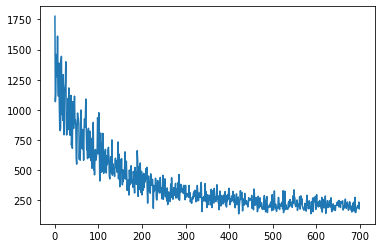

In [398]:
plt.plot(history);

Mesmo que pareça um pouco estranho no início, observe o que acontece quando plotamos os resultados:

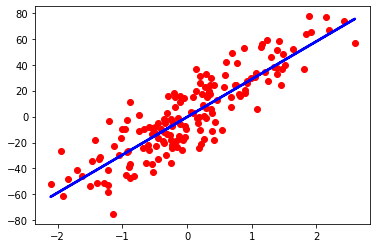

In [399]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, predictions, c='blue', lw=2.5);

Conseguimos excelentes aproximações dos dados!